In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


Understanding the data

About Dataset

Marketing campaign data of 2,240 customers of Maven Marketing, including customer profiles, product preferences, campaign successes/failures, and channel performance.:

This data was gathered during last year's campaign.
Data description is as follows;

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
ID - Unique ID of each customer
Year_Birth - Age of the customer
Complain - 1 if the customer complained in the last 2 years
Dt_Customer - date of customer's enrollment with the company
Education - customer's level of education
Marital - customer's marital status
Kidhome - number of small children in customer's household
Teenhome - number of teenagers in customer's household
Income - customer's yearly household income
MntFishProducts - the amount spent on fish products in the last 2 years
MntMeatProducts - the amount spent on meat products in the last 2 years
MntFruits - the amount spent on fruits products in the last 2 years
MntSweetProducts - amount spent on sweet products in the last 2 years
MntWines - the amount spent on wine products in the last 2 years
MntGoldProds - the amount spent on gold products in the last 2 years
NumDealsPurchases - number of purchases made with discount
NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
NumStorePurchases - number of purchases made directly in stores
NumWebPurchases - number of purchases made through the company's website
NumWebVisitsMonth - number of visits to company's website in the last month
Recency - number of days since the last purchase



### Goal of this Analysis
1) Are there any null values or outliers? How will you handle them?

2) What factors are significantly related to the number of web purchases?

 3)What does the average customer look like?

 3) Which products are performing best? 

4) Which channels are underperforming?
5) Is there  any relation between income and customer's response?


In [2]:
df = pd.read_csv('superstore_data.csv')
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


In [3]:
df.shape

(2240, 22)

There are 2240 rows and 22 columns in the given dataset.

In [4]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [5]:
df.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,1/9/2012,99,169,...,188,0,144,1,8,5,4,7,1,0


Data Preparation and EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are 18 integer type ,1 float type, 3 object type  of columns.




 The type of 'Dt_Customer' column should be of type Date, not Object.

In [7]:
# replacing the type of 'Dt_Customer' column.

df['Dt_Customer'] = pd.to_datetime(df.Dt_Customer).dt.to_period('M')

In [8]:
df.Dt_Customer.sort_values()

2239    2012-01
738     2012-01
1375    2012-01
1398    2012-01
1435    2012-01
         ...   
504     2014-12
479     2014-12
478     2014-12
950     2014-12
52      2014-12
Name: Dt_Customer, Length: 2240, dtype: period[M]

In [9]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


Some columns have discrepants values, such as the 'Income' Column' and columns representing the amount spent on certain
type of products, like 'MntMeatProducts' and 'MntWines' columns.

These atipical values can disrupt our model.

1. Are there any null values or outliers? How will you handle them?
Checking for null values

In [10]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [11]:
# checking the null values of 'Income' column

df[df.Income.isnull()]

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
134,8996,1957,PhD,Married,NaN,2,1,2012-11,4,230,...,49,37,53,12,7,2,8,9,0,0
262,1994,1983,Graduation,Married,NaN,1,0,2013-11,11,5,...,0,2,1,1,1,0,2,7,0,0
394,3769,1972,PhD,Together,NaN,1,0,2014-02,17,25,...,0,0,3,1,1,0,3,7,0,0
449,5255,1986,Graduation,Single,NaN,1,0,2013-02,19,5,...,3,263,362,0,27,0,0,1,0,0
525,8268,1961,PhD,Married,NaN,0,1,2013-11,23,352,...,10,0,15,3,6,1,7,6,0,0
590,10629,1973,2n Cycle,Married,NaN,1,0,2012-09,25,25,...,17,4,17,3,3,0,3,8,0,0
899,10475,1970,Master,Together,NaN,0,1,2013-01,39,187,...,26,20,14,2,4,2,6,5,0,0
997,9235,1957,Graduation,Single,NaN,1,1,2014-05,45,7,...,2,0,1,1,1,0,2,7,0,0
1096,4345,1964,2n Cycle,Single,NaN,1,1,2014-12,49,5,...,2,0,4,1,1,0,2,7,0,0
1185,7187,1969,Master,Together,NaN,1,1,2013-05,52,375,...,94,66,96,7,4,10,4,3,0,0


In [12]:
# assigning the median to null values of 'Income' column

df.loc[df.Income.isnull(), 'Income'] = np.nanmedian(df.Income)

Handling outliers

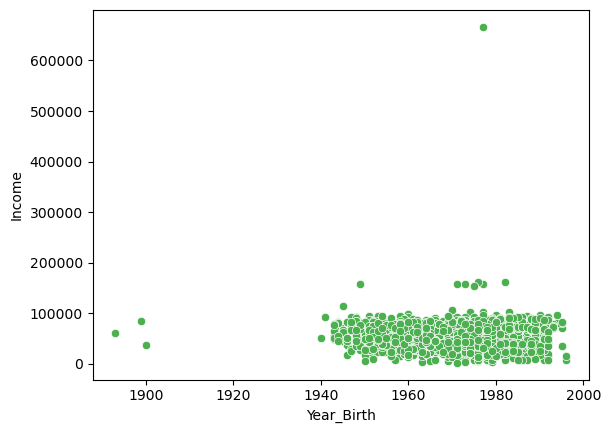

In [13]:
fig, ax = plt.subplots()

sns.scatterplot(df, x='Year_Birth', y='Income', ax=ax, color='#4CAF50')

plt.show()

# We can see from plot that there are only 3 values below 1900 till 1940 . lert us see how many customers are in this range.And only one value is above 600000 .These can be considered as outliers.

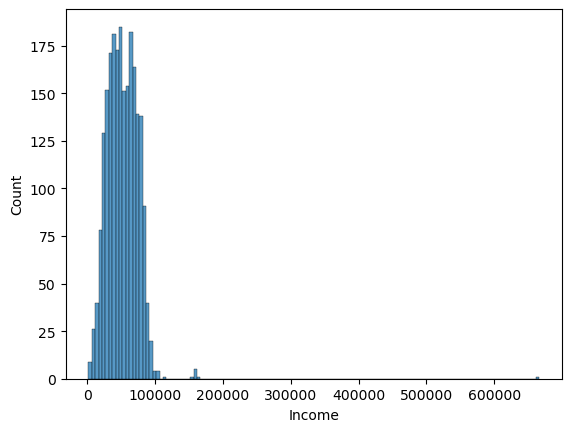

In [14]:
#checking the distribution of income through histplot

sns.histplot(data = df, x = 'Income')
plt.show()


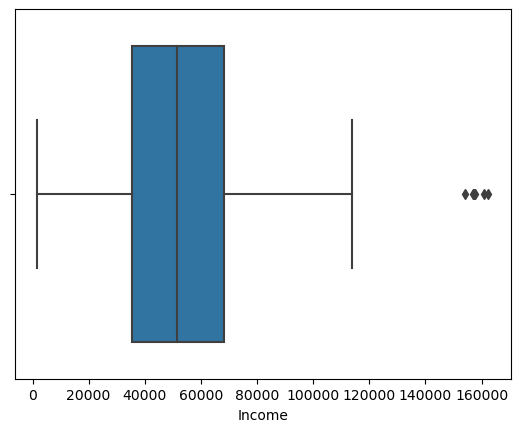

In [15]:
#Removing outlier

df = df[df['Income'] <= 200000]
sns.boxplot(data = df, x = 'Income')
plt.show()

There is a significant time gap between 1900 and 1940 in the 'Birth_Year' column with no values. Additionally, there are only 3 customers who were born before 1901. These values are undoubtedly outliers, and there is a possibility that a data entry error occurred in these cases


And there is only one value in the 'Income' column that deviates significantly from the expected pattern.


These values in both columns must be treated to prevent them from negatively influencing our insights and, more importantly, our model

In [16]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

Now we can make  detail insights to check for outliers with respect to year_birth and Income.

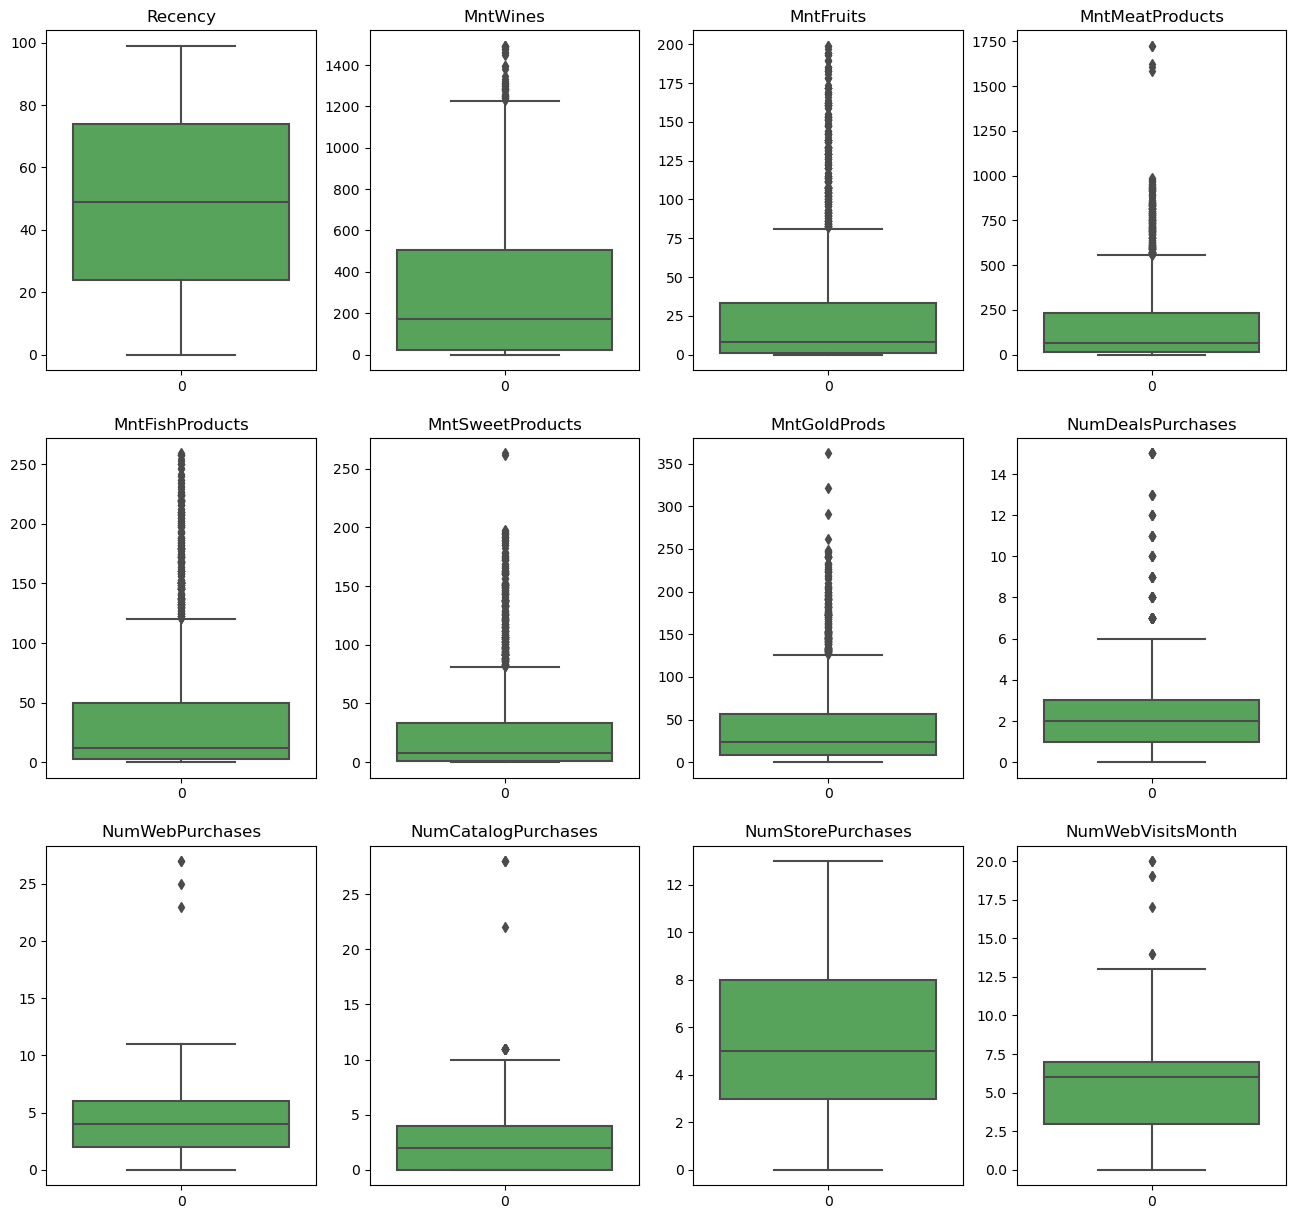

In [17]:
list_boxplots = ['Recency','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))

cont = 0
for i in range(3):
    for j in range(4):
        sns.boxplot(df[list_boxplots[cont]], ax=ax[i][j], color='#4CAF50')
        ax[i][j].set_title(list_boxplots[cont])
        cont = cont + 1

There are columns that have some outliers, and others that have even more.

Let's drop those samples that have more distant outliers

In [18]:
df.drop(df.index[df.MntMeatProducts > 1500], inplace=True)
df.drop(df.index[df.MntSweetProducts > 250], inplace=True)
df.drop(df.index[df.MntGoldProds > 250], inplace=True)

In [19]:
#As we dont need ID for further study let us drop the column.
df.drop('Id', axis=1, inplace=True)

Thirtythree samples were dropped compared to the origianl dataset

Now, we can make our insights without worrying about extreme outliers.

In [20]:
# excluding these samples

df.drop(df.index[df.Year_Birth <= 1900], inplace=True)
df.drop(df.index[df.Income > 600000], inplace=True)

In [21]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,2014-06,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,2014-06,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,2014-05,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,2014-11,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,2014-08,0,6,16,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,2013-07,99,372,18,...,47,48,78,2,5,2,11,4,0,0
2236,1977,2n Cycle,Married,31056.0,1,0,2013-01,99,5,10,...,3,8,16,1,1,0,3,8,0,0
2237,1976,Graduation,Divorced,46310.0,1,0,2012-03,99,185,2,...,15,5,14,2,6,1,5,8,0,0
2238,1978,Graduation,Married,65819.0,0,0,2012-11,99,267,38,...,149,165,63,1,5,4,10,3,0,0


In [22]:
df.shape

(2226, 21)

2. What factors are significantly related to the number of web purchases?

In [23]:
df['age'] = 2014-df['Year_Birth']
df['age']

0       44
1       53
2       56
3       47
4       25
        ..
2235    38
2236    37
2237    38
2238    36
2239    45
Name: age, Length: 2226, dtype: int64

In [24]:
#df = df[df['age']<70]
#bins = [15, 20, 30, 40,50,60]
#names = ['<20', '20-30', '30-40', '40-50', '50-60','60-70']
#d = dict(enumerate(names, 1))
#df['agerange'] = np.vectorize(d.get)(np.digitize(df['age'], bins))


#NumPy: np.digitize
#np.digitize provides another clean solution. The idea is to define your boundaries and names, 
#create a dictionary, then apply np.digitize to your Age column. Finally, use your dictionary to map your category names.

#Note that for boundary cases the lower bound is used for mapping to a bin.



In [25]:
#df['agerange'].value_counts()

In [26]:
#ager_df = df.groupby('agerange').agg({
 #   'agerange': lambda x: len(x)
#})
#ager_df.rename(columns = {'agerange': 'count'}, inplace = True)
#ager_df.sort_values('count').plot(kind = 'bar', figsize = (15,8))
#plt.xlabel('Age Range')    
#plt.ylabel('Count')
#plt.title('Customers Age Group')
#plt.show()


In the given dataset the maximum customers are in age group 40 to 50yrs.

In [27]:
#sns.barplot(x='agerange',y='NumWebPurchases',data=df)
#plt.show()

Agegroup 60 -70 shows max no. of Numwebpurchasing rate as this this is senior citizen group. so we can say that its more
convenient  way of purchasing for old aged people.

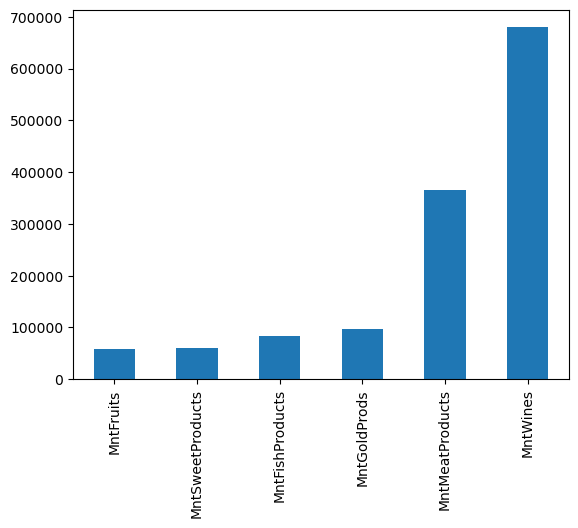

MntFruits            58710
MntSweetProducts     60007
MntFishProducts      83883
MntGoldProds         97078
MntMeatProducts     365037
MntWines            679745
dtype: int64

In [28]:
#3. Which products are performing best?
#Making sum of all values for each category

product_df = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
product_df.sum().sort_values().plot(kind = 'bar')
plt.show()
product_df.sum().sort_values()


Best performing product is wines followed by Meatproducts.
Fruits are the least performing product.


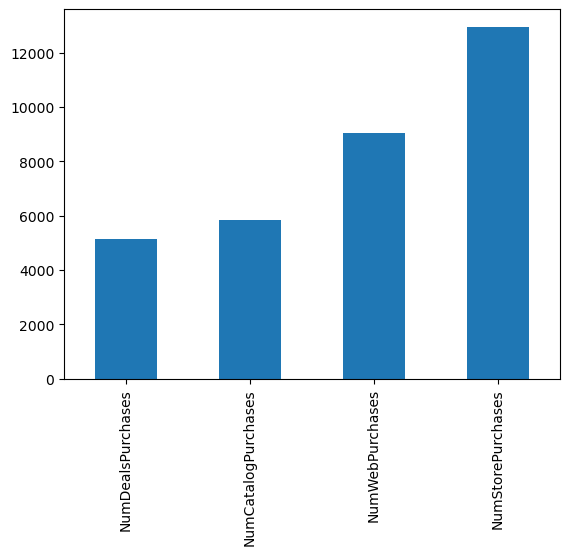

NumDealsPurchases       5156
NumCatalogPurchases     5848
NumWebPurchases         9037
NumStorePurchases      12955
dtype: int64

In [29]:
#4 Which Channels are underperforming?
#summing up the values in each product

channel_df = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
channel_df.sum().sort_values().plot(kind = 'bar')
plt.show()
channel_df.sum().sort_values()

From graph we can see that NumDealPurchases channel is lowest performing whereas NumstorePurchases are highest in performance.

In [30]:
#5)Is there any impact of customers registration  date on response?

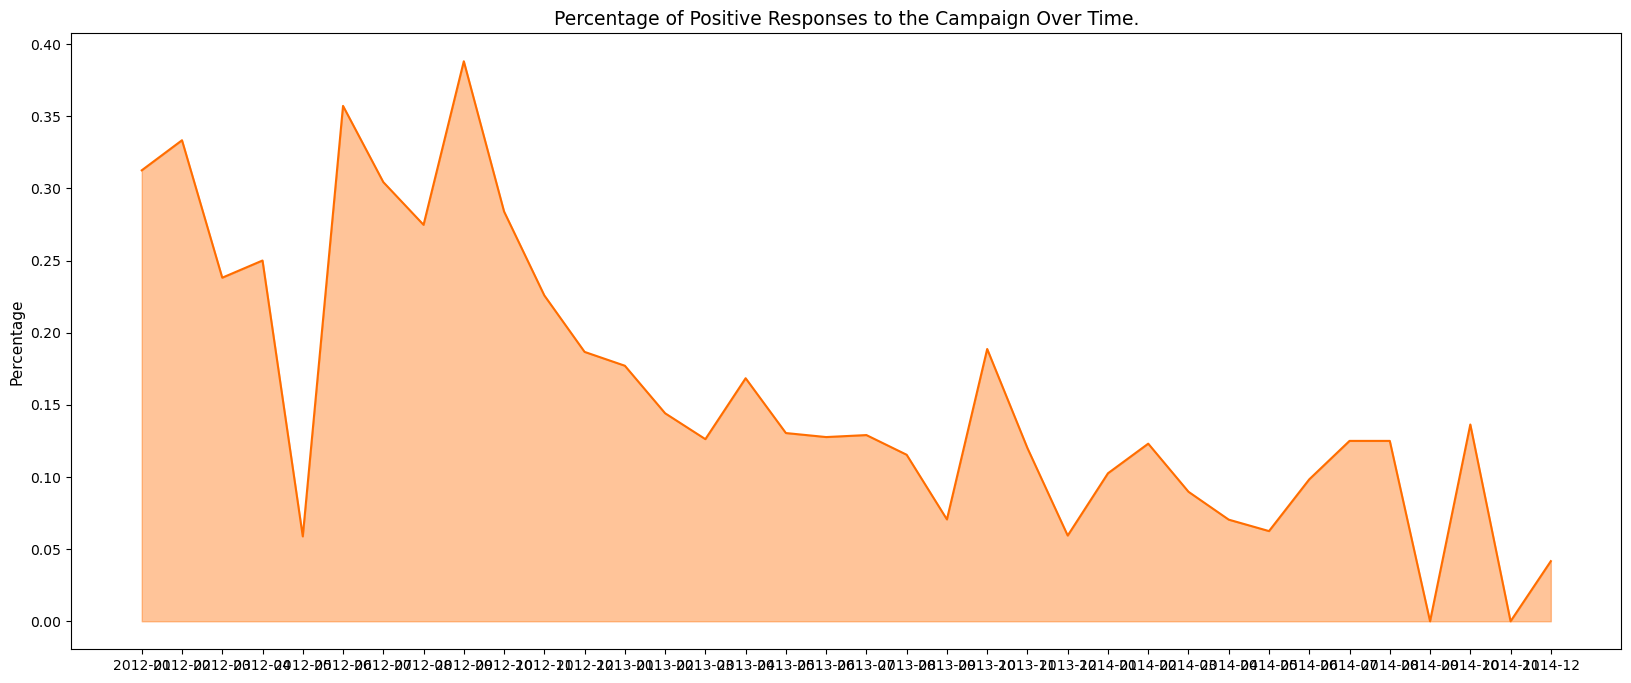

In [32]:
response_date = df.groupby('Dt_Customer')['Response'].mean().reset_index()
response_date['Dt_Customer'] = response_date.Dt_Customer.astype(str)

fig, ax = plt.subplots(figsize=(20,8))

plt.plot(response_date['Dt_Customer'], response_date['Response'], color='#ff6d00')
plt.fill_between(response_date['Dt_Customer'], response_date['Response'], color='#ff6d00', alpha=0.4)

ax.set_title('Percentage of Positive Responses to the Campaign Over Time.', fontsize=13.5)
ax.set_ylabel('Percentage', fontsize=11)

plt.show()


It is possible to observe that long-standing customers are more likely than new customers to provide a positive response to the campaign.

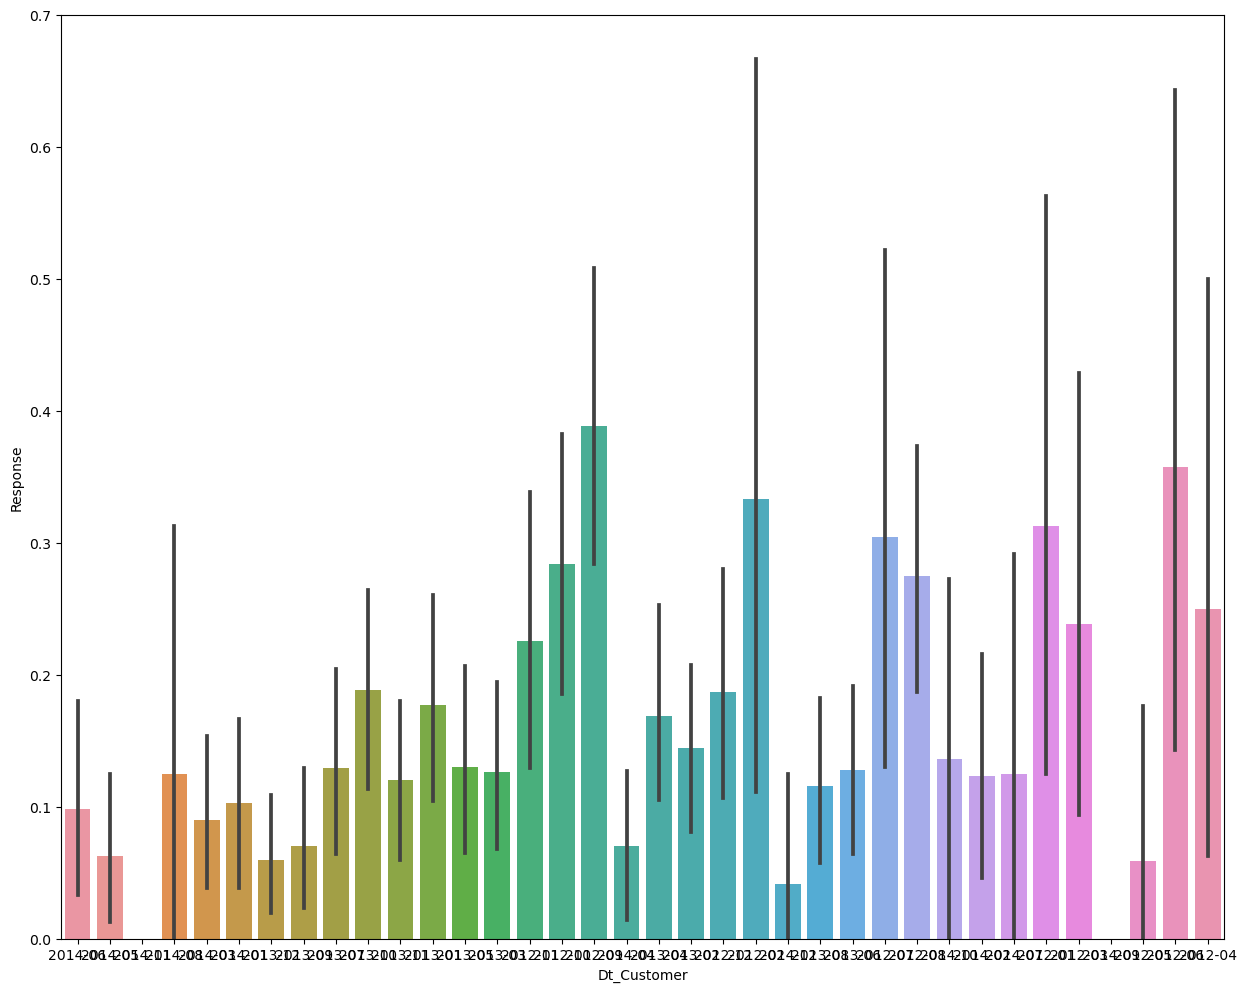

In [756]:
plt.figure(figsize=(15,12))
sns.barplot(x='Dt_Customer',y='Response',data=df)
plt.show()

It is possible to observe that long-standing customers are more likely than new customers to provide a positive
response to the campaign.

In [ ]:
# 6 Is there any Effect of annual income on response?

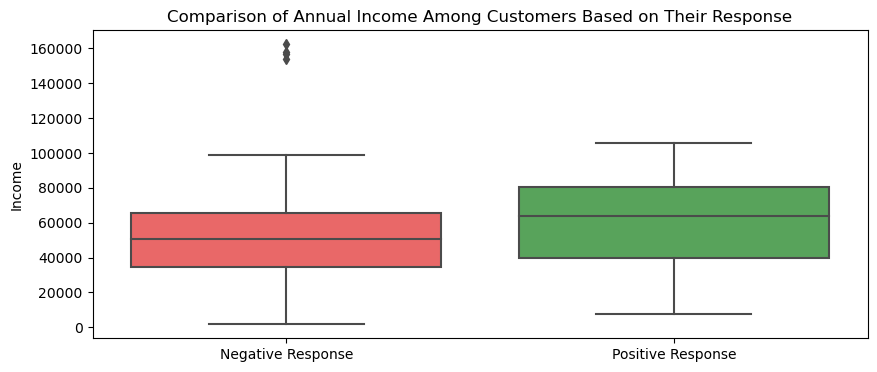

In [34]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(df, x='Response', y='Income', ax=ax, palette=['#FF5252', '#4CAF50'])

#ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Comparison of Annual Income Among Customers Based on Their Response', fontsize=12)

ax.set_xticklabels(['Negative Response', 'Positive Response'])
ax.set_xlabel('')

plt.show()


We can see that customers who provide a positive response, have a higher annual income.

In [35]:
categorical_cols = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']

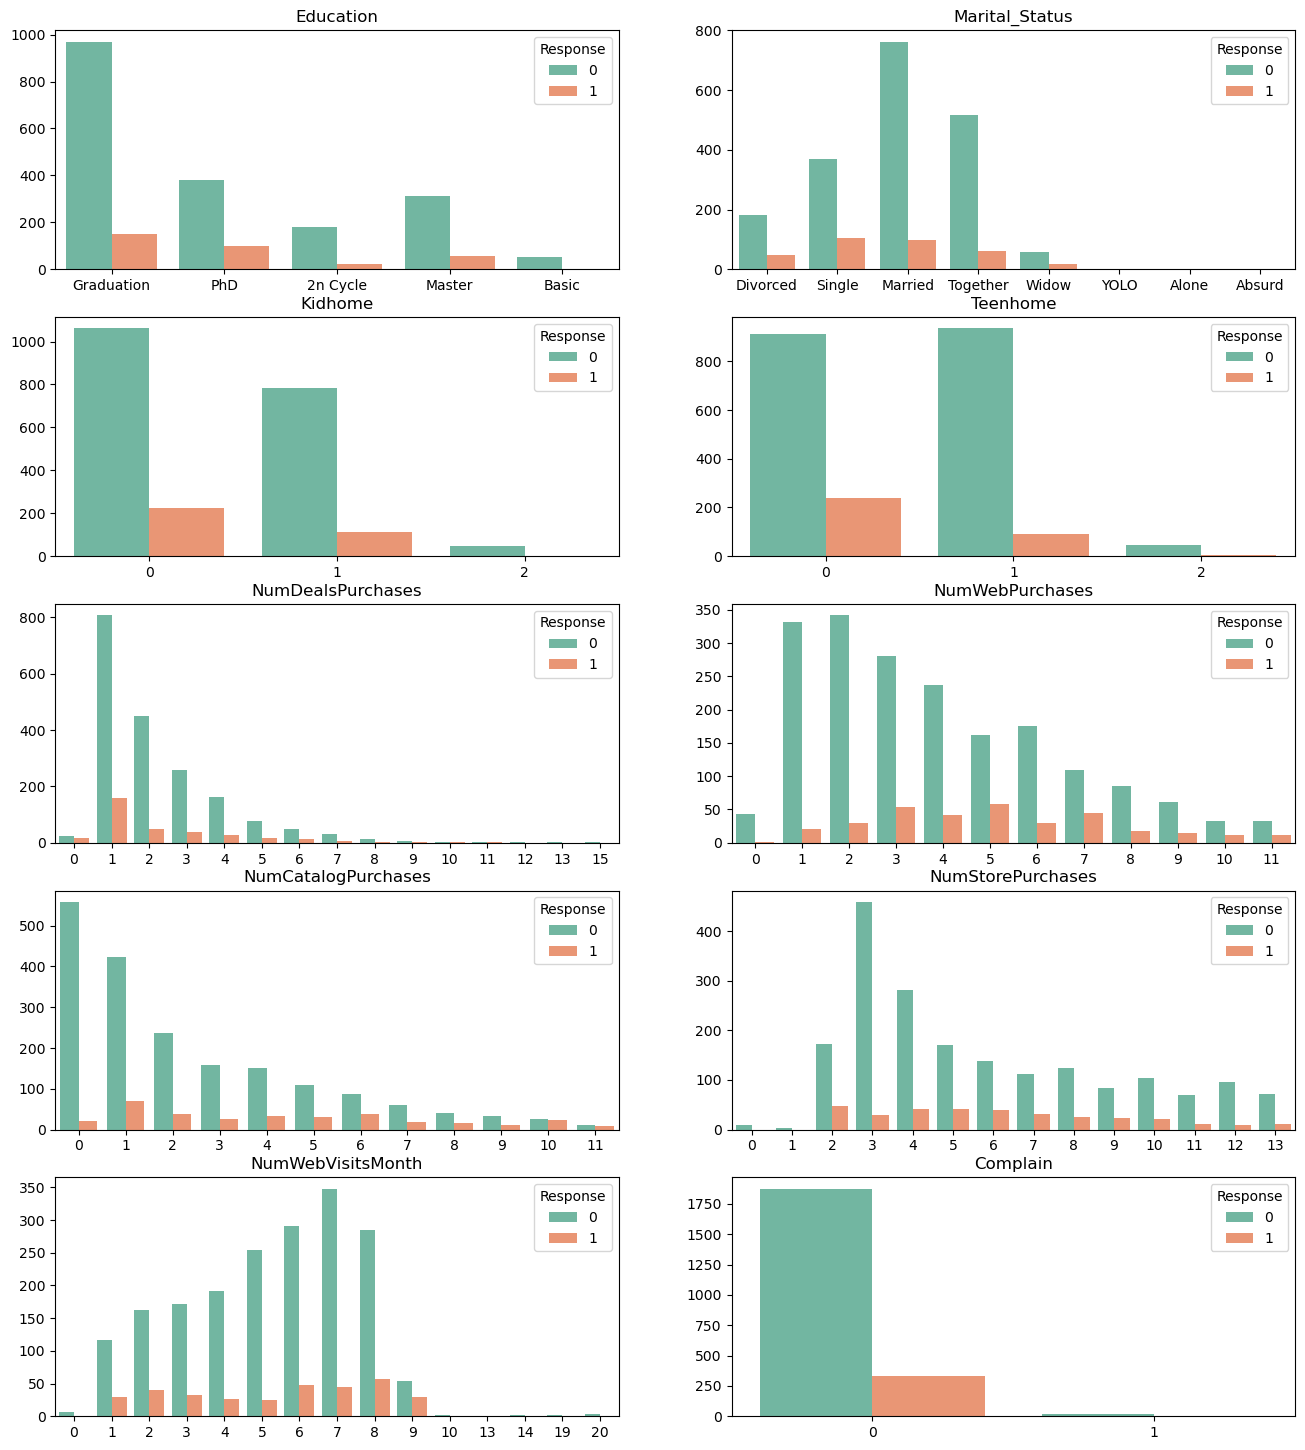

In [36]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(16, 18))

cont = 0
for i in range(5):
    for j in range(2):
        sns.countplot(df, x=categorical_cols[cont], hue='Response', ax=ax[i][j], palette='Set2')
        
        ax[i][j].set_title(categorical_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        
        cont = cont + 1
        
plt.show()


As number of purchases, both through the catalog and in store and on the web, increases, the percentage of customers
responding positively to the campaign will also increase.
Also from the plots we can see that the more positive response is given by Graduates,singles followed by married ,customers having teens and kids at home.

In [37]:
continuous_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

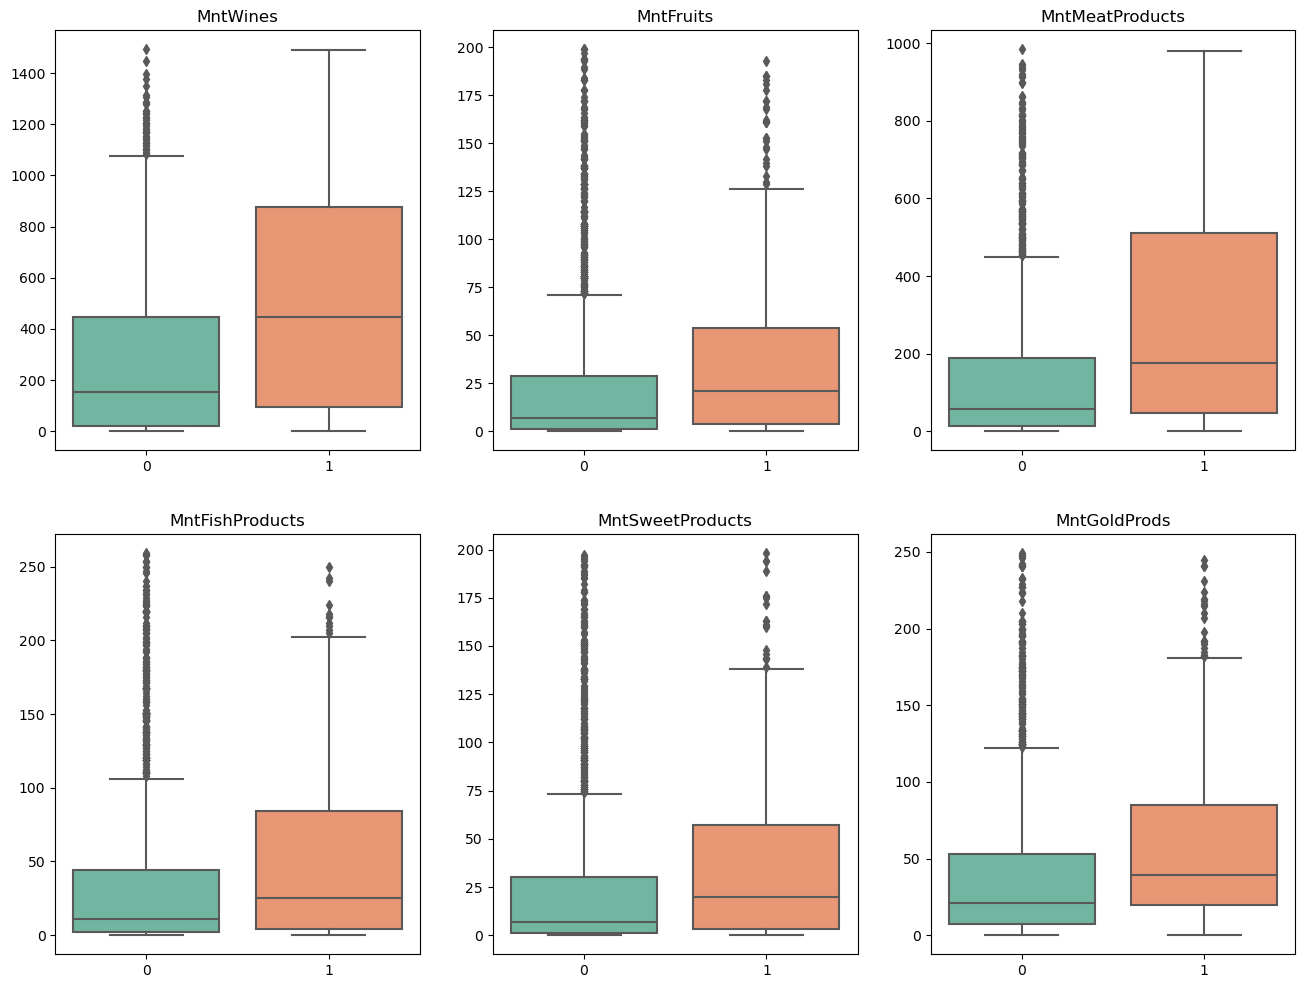

In [38]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(16, 12))

cont = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(df, y=continuous_cols[cont], x='Response', ax=ax[i][j], palette='Set2')
        
        ax[i][j].set_title(continuous_cols[cont])
        ax[i][j].set_ylabel('')
        ax[i][j].set_xlabel('')
        
        cont = cont + 1
        
plt.show()


As customers purchase more of these products, the likelihood of their responding positively to the campaign increases.

Preprocessing and Modelling

preprocessing

In [40]:
 #converting the date column into integer numbers.

sorted_dt = sorted([str(val) for val in df.Dt_Customer.unique()])# To sort the DataFrame based on the values in a single column, you'll use . sort_values() .
                                                           #By default, this will return a new DataFrame sorted in ascending order.

df['Dt_Customer'] = df.Dt_Customer.apply(lambda val: sorted_dt.index(str(val)))

In [41]:
df['Dt_Customer']

0       22
1       22
2       21
3       28
4       25
        ..
2235    10
2236     4
2237    12
2238     2
2239     0
Name: Dt_Customer, Length: 2226, dtype: int64

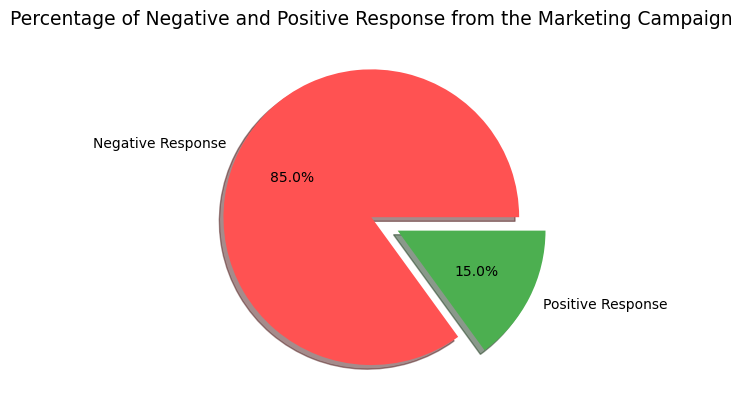

In [42]:
fig, ax = plt.subplots()

ax.pie(
    df.Response.value_counts().values,
    labels=["Negative Response","Positive Response"],
    autopct="%1.1f%%",
    explode=(0, 0.2),
    shadow=True,
    colors=['#FF5252', '#4CAF50']
)

ax.set_title('Percentage of Negative and Positive Response from the Marketing Campaign', fontsize=13.5)

plt.show()


Our dataset suffers from Unbalanced classes with only 15% of customers providing a positive response, 
before modeling, we need balance the data to avoid favoring the majority class.

Now we need  
to standardized , balance and split data into training and testing

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
LE=LabelEncoder()
df['Education']=LE.fit_transform(df['Education'])

df['Marital_Status'] = LE.fit_transform(df['Marital_Status'])
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,age
0,1970,2,2,84835.0,0,0,22,0,189,104,...,189,218,1,4,4,6,1,1,0,44
1,1961,2,4,57091.0,0,0,22,0,464,5,...,0,37,1,7,3,7,5,1,0,53
2,1958,2,3,67267.0,0,1,21,0,134,11,...,2,30,1,3,2,5,2,0,0,56
3,1967,2,5,32474.0,1,1,28,0,10,0,...,0,0,1,1,0,2,7,0,0,47
4,1989,2,4,21474.0,1,0,25,0,6,16,...,0,34,2,3,1,2,7,1,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,4,2,66476.0,0,1,10,99,372,18,...,48,78,2,5,2,11,4,0,0,38
2236,1977,0,3,31056.0,1,0,4,99,5,10,...,8,16,1,1,0,3,8,0,0,37
2237,1976,2,2,46310.0,1,0,12,99,185,2,...,5,14,2,6,1,5,8,0,0,38
2238,1978,2,3,65819.0,0,0,2,99,267,38,...,165,63,1,5,4,10,3,0,0,36


In [64]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state =5)

In [65]:
x = df.drop('Response', axis=1)
y = df.Response

In [66]:
x_train.shape


(1669, 21)

In [67]:
y_train.shape

(1669,)

In [68]:
x_test.shape

(557, 21)

In [69]:
y_test.shape

(557,)

Model Evaluation

In [134]:
models_evaluation = pd.DataFrame({
    'Model': [], 
    'Precision': [],
    'Recall': [],
    'Accuracy': []
})

In [135]:
def concat_evaluations(df, y_pred, model):
    new_model = pd.DataFrame({
        'Model': [model],
        'Precision': [precision_score(y_pred=y_pred, y_true=y_test)],
        'Recall': [recall_score(y_pred=y_pred, y_true=y_test)],
        'Accuracy': [accuracy_score(y_pred=y_pred, y_true=y_test)]
    })
    
    models_evaluation = pd.concat([df, new_model], axis=0, ignore_index=True)
    
    return models_evaluation


# Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
LR = LogisticRegression()


In [138]:
LR.fit(x_train,y_train)

LogisticRegression()

In [139]:
#Predicting the Test set results
y_pred = LR.predict(x_test)

In [140]:
y_pred.shape

(557,)

In [141]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [142]:
#filling simple regression to the training set
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score

In [143]:
confusion_matrix(y_test,y_pred)

array([[468,   7],
       [ 66,  16]], dtype=int64)

In [144]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       534
           1       0.20      0.70      0.30        23

    accuracy                           0.87       557
   macro avg       0.59      0.79      0.62       557
weighted avg       0.95      0.87      0.90       557



In [145]:
models_evaluation = concat_evaluations(models_evaluation, y_pred, 'logistic regression')

# Decision Tree algorythm

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.25,random_state =5)

In [147]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [148]:
Dtr=DecisionTreeClassifier(max_depth=2)
Dtr.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

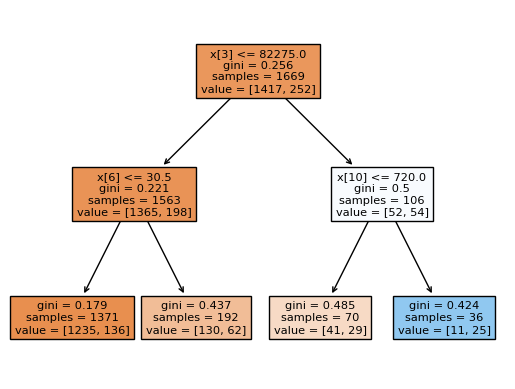

In [149]:
from sklearn import tree
tree.plot_tree(Dtr,filled=True)
plt.show()

In [150]:
y_pred=Dtr.predict(x_test)

In [151]:
from sklearn.metrics import classification_report,confusion_matrix

In [152]:
confusion_matrix(y_test,y_pred)

array([[469,   6],
       [ 77,   5]], dtype=int64)

In [153]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       475
           1       0.45      0.06      0.11        82

    accuracy                           0.85       557
   macro avg       0.66      0.52      0.51       557
weighted avg       0.80      0.85      0.80       557



In [154]:
models_evaluation = concat_evaluations(models_evaluation, y_pred, 'Decision Tree')

# Grid search cv

In [155]:
#preprunning
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter': ['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [156]:
from sklearn.model_selection import GridSearchCV

In [157]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [158]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [159]:
cv.best_params_  #best parameters

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [160]:
y_pred=cv.predict(x_test)

In [161]:
from sklearn.metrics import accuracy_score,classification_report

In [162]:
score=accuracy_score(y_pred,y_test)

In [163]:
score

0.8491921005385996

In [164]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       475
           1       0.44      0.10      0.16        82

    accuracy                           0.85       557
   macro avg       0.65      0.54      0.54       557
weighted avg       0.80      0.85      0.81       557



In [165]:
models_evaluation = concat_evaluations(models_evaluation, y_pred, 'Gridsearch CV')

# Random Forest algorythm

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
RF=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100)

In [168]:
RF.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [169]:
y_pred=RF.predict(x_test)

In [170]:
from sklearn.metrics import classification_report,confusion_matrix

In [171]:
confusion_matrix(y_test,y_pred)

array([[472,   3],
       [ 78,   4]], dtype=int64)

In [172]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       475
           1       0.57      0.05      0.09        82

    accuracy                           0.85       557
   macro avg       0.71      0.52      0.51       557
weighted avg       0.82      0.85      0.80       557



In [173]:
models_evaluation = concat_evaluations(models_evaluation, y_pred, 'RandomForest')

# XGboost algorythm

In [174]:
import xgboost as xgb
#define data_dmatrix
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [175]:
data_dmatrix

In [176]:
#import XGBClassifier
from xgboost import XGBClassifier
#declare parameters
params = {
        
          'objective': 'binary:logistic',
           'max_depth':4,
           'alpha': 10,
    'learning_rate':1.0,
    'n_estimators':100
        }
#instantiate the classifier
xgb_clf = XGBClassifier(**params)

#fit the classifier to the training data
xgb_clf.fit(x_train,y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [177]:
#make predictions with XDBoost cl
y_pred=xgb_clf.predict(x_test)

In [178]:
from sklearn.metrics import classification_report,confusion_matrix


In [179]:
confusion_matrix(y_test,y_pred)

array([[453,  22],
       [ 58,  24]], dtype=int64)

In [180]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       475
           1       0.52      0.29      0.38        82

    accuracy                           0.86       557
   macro avg       0.70      0.62      0.65       557
weighted avg       0.83      0.86      0.84       557



In [181]:
models_evaluation = concat_evaluations(models_evaluation, y_pred, 'XGboost')

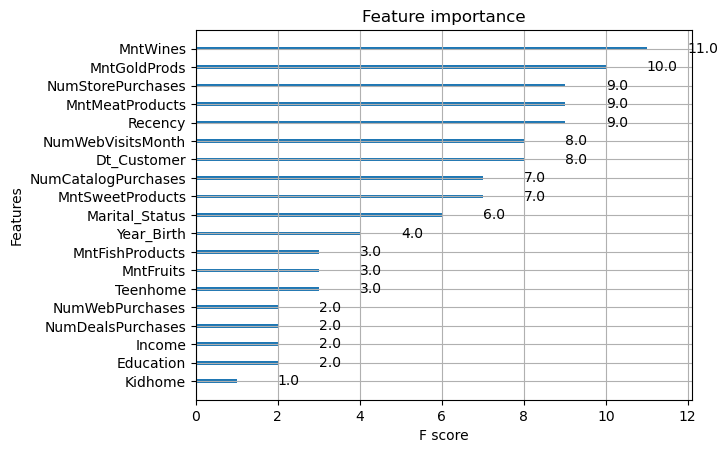

In [182]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] =[6,4]
plt.show()

# Naive bayes

In [183]:
from sklearn.naive_bayes import GaussianNB

In [184]:
NB=GaussianNB()

In [185]:
NB.fit(x_train,y_train)

GaussianNB()

In [186]:
y_pred=NB.predict(x_test)

In [187]:
from sklearn.metrics import classification_report,confusion_matrix

In [188]:
confusion_matrix(y_test,y_pred)

array([[379,  96],
       [ 31,  51]], dtype=int64)

In [189]:
print (classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       410
           1       0.62      0.35      0.45       147

    accuracy                           0.77       557
   macro avg       0.71      0.64      0.65       557
weighted avg       0.75      0.77      0.75       557



In [190]:
models_evaluation = concat_evaluations(models_evaluation, y_pred, 'NaiveBayes')

In [193]:
models_evaluation.sort_values(by='Accuracy')

,Model,Precision,Recall,Accuracy
5,NaiveBayes,0.346939,0.621951,0.771993
2,Gridsearch CV,0.444444,0.097561,0.849192
1,Decision Tree,0.454545,0.060976,0.850987
3,RandomForest,0.571429,0.048780,0.854578
4,XGboost,0.521739,0.292683,0.856373
0,logistic regression,0.695652,0.195122,0.868941


Conclusion:

Customers who live alone tend to have higher web purchase.
Customers from Mexico also have higher web purchase.
Customers who have more kids at home tend to have lower web purchase.
Customer with marital status: Absurd and Widow have low web purchase.
Age and Income has almost not relationship with web purchase.
The 4th campaign is more successful, 5th and 3th campaign are close and also successful.
The average customer is a 45 years old married graduate with 1 kid and a yearly household income of 51,969.86.
Wine is the best performing product and next to it is meat.
the Deals channel has the lowest performance, with a total purchase of 5145.
Recommendations
Target customers who live alone and customers from Mexico as they tend to have higher web purchases.
Consider offering promotions or incentives for customers with more kids at home to increase their web purchases.
Improve marketing campaigns targeted towards customers with marital s